# 1. Importing Libraries & Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

# 2. Importing Datasets

In [3]:
# Importing the datasets into DataFrames.
xls = pd.ExcelFile('/home/jovyan/notebooks/H2398831_EMA_2020J/data/Index_of_Multiple_Deprivation.xlsx')
data1 = pd.read_excel(xls, 'IMD 2015')
data2 = pd.read_excel('/home/jovyan/notebooks/H2398831_EMA_2020J/data/Pupil_Residency_and_School_Location_Tables_PR3.xls')


# 3. Displaying Dataframes 

In [4]:
# Displaying a preview of the Dataframes to get a sense of them. 
df1 = data1.head(10)
df2 = data2.head(10)

display_side_by_side(df1,df2, titles=['Index of Deprivation','Percentage A*-C achieved by students of a given region'])

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)
0,E01031349,Adur 001A,E07000223,Adur,21352,7
1,E01031350,Adur 001B,E07000223,Adur,8864,3
2,E01031351,Adur 001C,E07000223,Adur,22143,7
3,E01031352,Adur 001D,E07000223,Adur,17252,6
4,E01031370,Adur 001E,E07000223,Adur,15643,5
5,E01031374,Adur 001F,E07000223,Adur,21176,7
6,E01031338,Adur 002A,E07000223,Adur,27934,9
7,E01031339,Adur 002B,E07000223,Adur,28249,9
8,E01031340,Adur 002C,E07000223,Adur,27569,9
9,E01031365,Adur 002D,E07000223,Adur,18352,6


# 4. Combining the Dataframes on LSOA code for the purpose of graphing

In [5]:
#First the two dataframes need to be sorted by the Local Authority District code.
data1.sort_values(['Local Authority District code (2013)'], ascending=[True], inplace=True)
data2.sort_values(['Local Authority District'], ascending=[True], inplace=True)

#Then the data needs to be cleaned and duplicates removed
clean1 = data1.drop_duplicates(subset=['Local Authority District code (2013)'], keep='first')
clean2 = data2[data2['Local Authority District'].isin(clean1['Local Authority District code (2013)'])]
# Finally they can be merged on the District code.
df_merge = pd.merge(clean1, clean2, left_on='Local Authority District code (2013)', right_on='Local Authority District', how='left')

df_merge

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Local Authority District,Column,Column2,Number of eligible pupils1,Percentage of pupils achieving: 5+ A*-C grades,5+ A*-C grades inc. English and mathematics GCSEs,5+ A*-G grades,5+ A*-G grades inc. English and mathematics GCSEs,A*-C in English and mathematics GCSEs,Entering the English Baccalaureate,Achieving the English Baccalaureate
0,E01011978,Hartlepool 012D,E06000001,Hartlepool,358,1,E06000001,00EB,Hartlepool UA,1096.0,63.3,53.1,94.0,90.9,55.5,30.3,18.6
1,E01012026,Middlesbrough 006A,E06000002,Middlesbrough,10148,4,E06000002,00EC,Middlesbrough UA,1500.0,62.3,48.6,92.8,90.2,50.6,26.1,16.1
2,E01012100,Redcar and Cleveland 001A,E06000003,Redcar and Cleveland,499,1,E06000003,00EE,Redcar and Cleveland UA,1545.0,61.6,53.2,92.7,89.0,56.1,21.5,13.8
3,E01012218,Stockton-on-Tees 016C,E06000004,Stockton-on-Tees,15658,5,E06000004,00EF,Stockton-on-Tees UA,2165.0,69.9,59.2,94.1,90.8,61.2,37.6,25.5
4,E01012325,Darlington 005A,E06000005,Darlington,16726,6,E06000005,00EH,Darlington UA,1171.0,62.2,52.2,93.5,90.2,55.5,32,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,E01032623,Sutton 025E,E09000029,Sutton,31738,10,E09000029,00BF,Sutton,2093.0,76.2,63.8,96.2,93.8,64.8,41.7,32.3
322,E01004255,Tower Hamlets 023C,E09000030,Tower Hamlets,4059,2,E09000030,00BG,Tower Hamlets,2291.0,73.4,64.6,96.5,93.8,66.8,47.4,30.6
323,E01004364,Waltham Forest 019B,E09000031,Waltham Forest,5779,2,E09000031,00BH,Waltham Forest,2634.0,71.1,61.1,96.3,93.1,62.7,40.8,26.5
324,E01004537,Wandsworth 007B,E09000032,Wandsworth,5712,2,E09000032,00BJ,Wandsworth,1715.0,70.3,60.3,94.8,92.2,62.4,50.1,32.8


# 5. Visualizing the data as plots to get a sense for any obvious trends

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


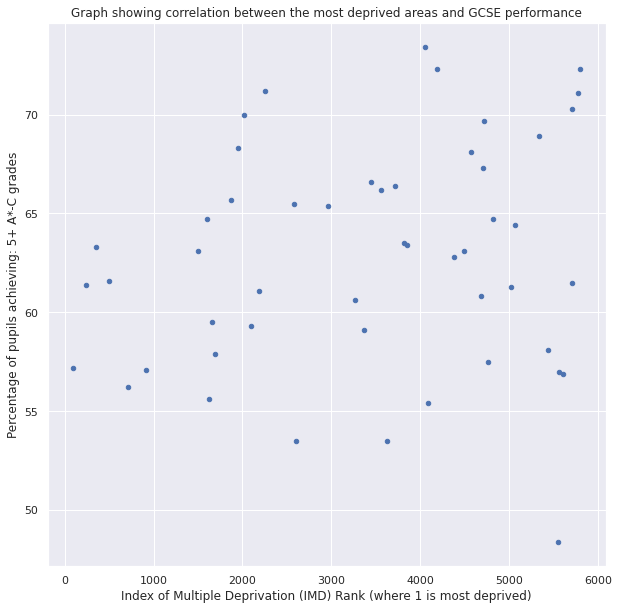

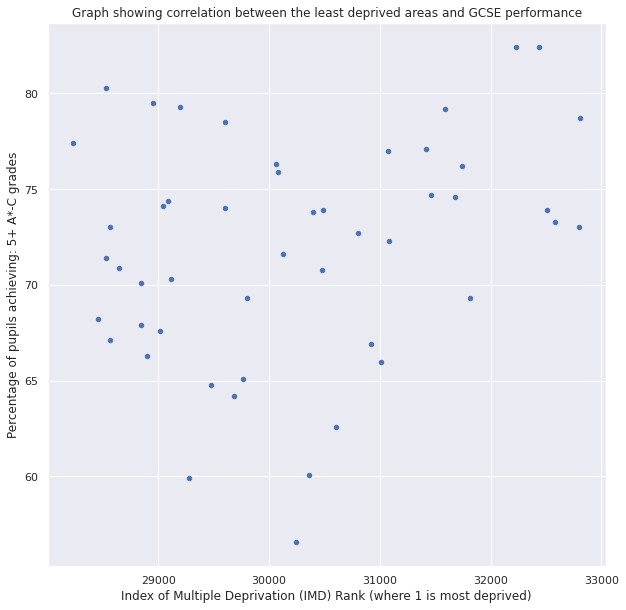

In [6]:
#Sorting the data into two subsets, one of the most deprived areas and one of the least deprived areas.
sorted_most = df_merge.sort_values(by=['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'], ascending=True)
sorted_least = df_merge.sort_values(by=['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'], ascending=False)

# PLotting the two sets as graphs to spot an obvious correaltions. 
plot_most = sorted_most.head(50).plot(x='Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', y='Percentage of pupils achieving: 5+ A*-C grades', kind='scatter', figsize=(10,10), title='Graph showing correlation between the most deprived areas and GCSE performance', style='o')
plot_least = sorted_least.head(50).plot(x='Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', y='Percentage of pupils achieving: 5+ A*-C grades', kind='scatter', figsize=(10,10), title='Graph showing correlation between the least deprived areas and GCSE performance', style='o')

# 6. Carrying out statistical tests such as correlation tests and k-NN on the Dataframe

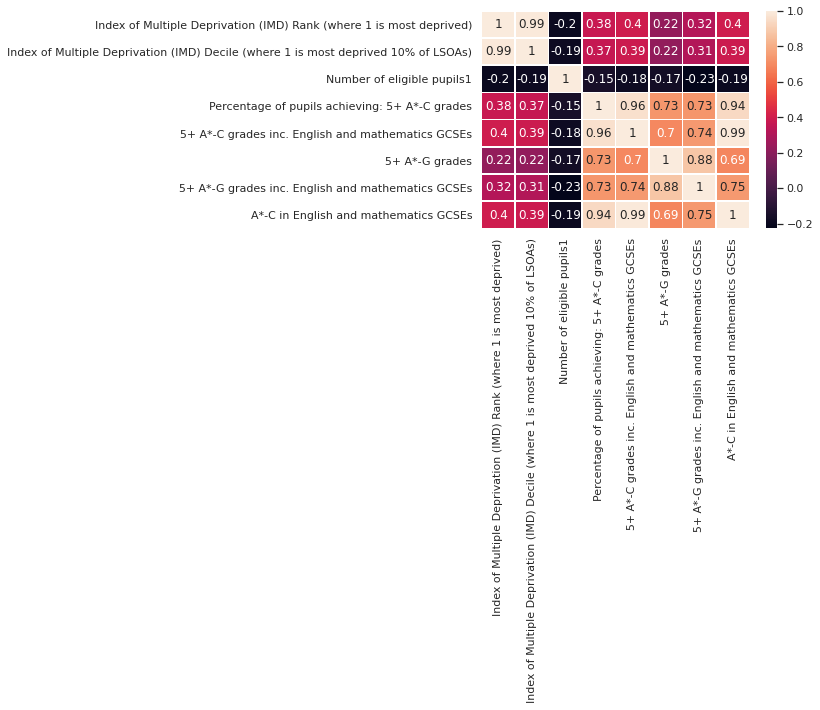

<AxesSubplot:title={'center':'Scatter plot of IMD (where 1 is the most deprived) predictions based on GCSE performance'}, xlabel='Percentage of pupils achieving: 5+ A*-C grades', ylabel='5+ A*-C grades inc. English and mathematics GCSEs'>

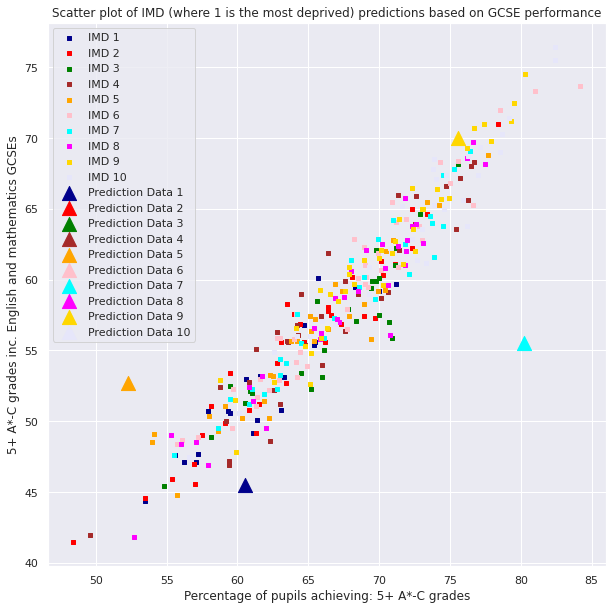

In [8]:
# We convert the merged dataframe to excel so we can clean it for further analysis.
df_merge.to_excel("output.xlsx", sheet_name='Sheet_name_1')

data3 = pd.read_csv('/home/jovyan/notebooks/H2398831_EMA_2020J/data/Deprivation_Index_and_GCSE_merge.csv', sep=r'\s*,\s*', engine='python')

# Creating a correlation matrix to get a numerical value for any correaltions we spotted earlier.  
corrMatrix = data3.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show()

#The correlation between the Index of Multiple Deprivation and the percentage of students who achieve 5+ A*-C grades is ~0.4
#this is typically considered a weak correlation. 
data3['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].corr(data3['Percentage of pupils achieving: 5+ A*-C grades'])


# Now we can set up a k-NN algorithim and train it to predict the multiple deprivation decile
# of students residence given their GCSE performance
# n_neighbors can be changed to change the value of k. 
classifier_3NN = KNeighborsClassifier(n_neighbors=14, metric='euclidean')

trainingData_df = data3[['5+ A*-C grades inc. English and mathematics GCSEs', 'Percentage of pupils achieving: 5+ A*-C grades']]
targetValues_ss = data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']

classifier_3NN.fit(trainingData_df, targetValues_ss)

trainingIndexPredict_df = pd.DataFrame({'5+ A*-C grades inc. English and mathematics GCSEs':[45.5, 52.7, 70.0, 55.5],
                            'Percentage of pupils achieving: 5+ A*-C grades':[60.5, 52.3, 75.6, 80.2]})


Prediction_df = trainingIndexPredict_df.copy()
Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)'] = classifier_3NN.predict(trainingIndexPredict_df)


Pred_df = Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']

IMD1_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==1]
IMD2_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==2]
IMD3_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==3]
IMD4_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==4]
IMD5_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==5]
IMD6_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==6]
IMD7_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==7]
IMD8_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==8]
IMD9_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==9]
IMD10_df = data3[data3['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==10]

PIMD1_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==1]
PIMD2_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==2]
PIMD3_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==3]
PIMD4_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==4]
PIMD5_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==5]
PIMD6_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==6]
PIMD7_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==7]
PIMD8_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==8]
PIMD9_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==9]
PIMD10_df = Prediction_df[Prediction_df['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']==10]



ax = IMD1_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='DarkBlue', figsize=(10,10), label="IMD 1", marker="s",
                         title="Scatter plot of IMD (where 1 is the most deprived) predictions based on GCSE performance")


IMD2_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Red', label="IMD 2", marker="s", ax=ax)
IMD3_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Green', label="IMD 3", marker="s", ax=ax)
IMD4_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Brown', label="IMD 4", marker="s", ax=ax)
IMD5_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Orange', label="IMD 5", marker="s", ax=ax)
IMD6_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Pink', label="IMD 6", marker="s", ax=ax)
IMD7_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Cyan', label="IMD 7", marker="s", ax=ax)
IMD8_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Magenta', label="IMD 8", marker="s", ax=ax)
IMD9_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Gold', label="IMD 9", marker="s", ax=ax)
IMD10_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                         kind='scatter', color='Lavender', label="IMD 10", marker="s", ax=ax)



PIMD1_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='DarkBlue', label="Prediction Data 1",
                 marker='^', s=200, ax=ax)
PIMD2_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Red', label="Prediction Data 2",
                 marker='^', s=200, ax=ax)
PIMD3_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Green', label="Prediction Data 3",
                 marker='^', s=200, ax=ax)
PIMD4_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Brown', label="Prediction Data 4",
                 marker='^', s=200, ax=ax)
PIMD5_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Orange', label="Prediction Data 5",
                 marker='^', s=200, ax=ax)
PIMD6_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Pink', label="Prediction Data 6",
                 marker='^', s=200, ax=ax)
PIMD7_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Cyan', label="Prediction Data 7",
                 marker='^', s=200, ax=ax)
PIMD8_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Magenta', label="Prediction Data 8",
                 marker='^', s=200, ax=ax)
PIMD9_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Gold', label="Prediction Data 9",
                 marker='^', s=200, ax=ax)
PIMD10_df.plot(x='Percentage of pupils achieving: 5+ A*-C grades', y='5+ A*-C grades inc. English and mathematics GCSEs',
                 kind='scatter', color='Lavender', label="Prediction Data 10",
                 marker='^', s=200, ax=ax)
                 
    
    
    


# Increasing the intial number of inputs into the trainingIndexPredict Dataframe should improve the accuracy of the final predictions.